In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ushape.csv')

In [3]:
df.head()

,X,Y,class
0,0.455,0.365,1
1,0.350,0.265,0
2,0.530,0.420,0
3,0.440,0.365,1
4,0.330,0.255,1


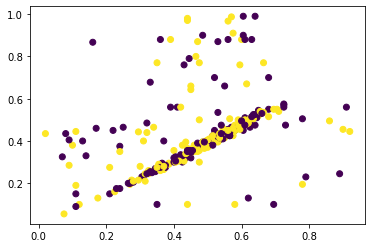

In [4]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [5]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [6]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

2023-04-05 14:03:03.092172: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# he_normal intialization + relU

In [16]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                30        
                                                                 
 dense_11 (Dense)            (None, 10)                110       
                                                                 
 dense_12 (Dense)            (None, 10)                110       
                                                                 
 dense_13 (Dense)            (None, 10)                110       
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


# wieghts before Training

In [17]:
model.get_weights()

[array([[-0.60171837, -0.5366805 ,  1.6678097 ,  0.89941114, -0.06958797,
         -1.0446366 , -0.8153107 ,  1.697468  ,  0.4831711 , -0.8926231 ],
        [-1.175506  , -1.2842038 , -0.05830454, -0.38845345, -2.0989    ,
          0.4015476 , -1.8913898 ,  1.1742936 ,  0.53880006,  0.28827387]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.39970642, -0.17054918, -0.26956868,  0.5235799 ,  0.11240346,
          0.5490202 , -0.60385257,  0.25110322,  0.46623012, -0.38400936],
        [ 0.2252051 , -0.27153888,  0.5200867 ,  0.21469118, -0.34977898,
          0.73369306,  0.09410778, -0.5654367 ,  0.22538918,  0.3956151 ],
        [-0.5827361 , -0.10105383,  0.24520212,  0.14204505,  0.20799942,
         -0.8518751 , -0.537534  , -0.93456286, -0.63468987,  0.6195696 ],
        [-0.49499097,  0.3946516 ,  0.1225318 ,  0.4686574 ,  0.21996433,
         -0.864906  , -0.12505925, -0.23556702,  0.07842599,  0.68414414],
        [-0.14403

In [18]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
8/8 [==============================] - 1s 22ms/step - loss: 0.8039 - accuracy: 0.5042 - val_loss: 0.7909 - val_accuracy: 0.5410
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 0.7671 - accuracy: 0.5042 - val_loss: 0.7616 - val_accuracy: 0.5410
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 0.7414 - accuracy: 0.5042 - val_loss: 0.7406 - val_accuracy: 0.5410
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 0.7253 - accuracy: 0.5042 - val_loss: 0.7256 - val_accuracy: 0.5410
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 0.7132 - accuracy: 0.5083 - val_loss: 0.7165 - val_accuracy: 0.5410
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 0.7062 - accuracy: 0.5083 - val_loss: 0.7106 - val_accuracy: 0.5410
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 0.7014 - accuracy: 0.5083 - val_loss: 0.7067 - val_accuracy: 0.5410
Epoch 8/100
8/8 [=========

8/8 [==============================] - 0s 6ms/step - loss: 0.6902 - accuracy: 0.5083 - val_loss: 0.7007 - val_accuracy: 0.4262
Epoch 60/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6903 - accuracy: 0.5125 - val_loss: 0.7012 - val_accuracy: 0.4262
Epoch 61/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6900 - accuracy: 0.5083 - val_loss: 0.7012 - val_accuracy: 0.4262
Epoch 62/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6900 - accuracy: 0.5292 - val_loss: 0.7011 - val_accuracy: 0.4262
Epoch 63/100
8/8 [==============================] - 0s 8ms/step - loss: 0.6901 - accuracy: 0.5208 - val_loss: 0.7011 - val_accuracy: 0.4262
Epoch 64/100
8/8 [==============================] - 0s 8ms/step - loss: 0.6899 - accuracy: 0.5125 - val_loss: 0.7008 - val_accuracy: 0.4262
Epoch 65/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6905 - accuracy: 0.5167 - val_loss: 0.7009 - val_accuracy: 0.4590
Epoch 66/100
8/8 [===============

# weights after training

In [20]:
model.get_weights()

[array([[-0.60171837, -0.5366805 ,  1.6462764 ,  0.85570997, -0.06958797,
         -1.2268001 , -0.8153107 ,  1.6383339 ,  0.5796141 , -0.9816743 ],
        [-1.175506  , -1.2842038 , -0.06982733, -0.45762536, -2.0989    ,
          0.32841197, -1.8913898 ,  1.1389453 ,  0.60753053,  0.33588958]],
       dtype=float32),
 array([ 0.        ,  0.        , -0.00071525, -0.02539688,  0.        ,
        -0.0206943 ,  0.        , -0.03614886,  0.00645621,  0.10653171],
       dtype=float32),
 array([[ 0.39970642, -0.17054918, -0.26956868,  0.5235799 ,  0.11240346,
          0.5490202 , -0.60385257,  0.25110322,  0.46623012, -0.38400936],
        [ 0.2252051 , -0.27153888,  0.5200867 ,  0.21469118, -0.34977898,
          0.73369306,  0.09410778, -0.5654367 ,  0.22538918,  0.3956151 ],
        [-0.9805341 , -0.11724778,  0.21256742,  0.18554826,  0.14227806,
         -0.9587852 , -0.537534  , -1.1815549 , -0.63468987,  0.56903636],
        [-0.49499097,  0.39313683,  0.05856977,  0.5128308 , 

# clearly the weights are changing it means the training happens.

3888/3888 [==============================] - 3s 801us/step


<AxesSubplot:>

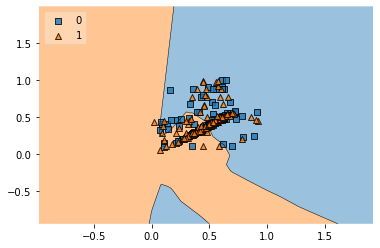

In [21]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [22]:
(np.random.randn(10,10)*0.01).min()

-0.032644206402040056

In [29]:
(np.random.randn(10,10)*0.01).max()

0.017813267349627612